In [92]:
import numpy as np         
import os                  
from random import shuffle
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
scores=dict()
from sklearn.metrics import confusion_matrix
from numba import jit, cuda
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score
import glob

In [2]:
def RefreshData(df):
    df.dropna
    df.reset_index(drop=True, inplace = True)
    df.sort_index(inplace=True)

In [3]:
# time drop
def time_drop(df):
    x=df['Time'].values[0]+7
    indexNames = df[df['Time'] <= x].index
    df.drop(indexNames , inplace=True)
    return df  

In [4]:
#merge rowes
def merge_rowes(df):
    df.set_index(" Hand Type", inplace = True)
    df_lf_sync = df.loc[["left"]].reset_index()
    df_rg_sync = df.loc[["right"]].reset_index()
    df_sync= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')
    return df_sync

In [5]:
# drop worng num of hands
def drop_hands(df,x):
    indexNames = df[df[' # hands'] == x].index
    df.drop(indexNames , inplace=True)
    return df

In [6]:
path = r'C:\Users\avida\Downloads\final_files\extraFiles\Training\Sync' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    frame_sy = pd.concat(li, axis=0, ignore_index=True)  

In [7]:
frame_sy=merge_rowes(frame_sy)
frame_sy

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,left,434.2387,139878,2,-80.92312,284.2069,29.011070,84.47700,-45.59256,134.20850,...,-0.320716,143.0681,170.9626,92.10286,290.9513,-17.46554,156.27410,0.0,0.036538,0.0
1,left,434.2553,139880,2,-79.71033,282.4789,31.691100,55.75132,-119.51820,158.45370,...,-0.333641,143.3853,166.9691,94.34527,293.7114,-20.13464,156.68940,0.0,0.001488,0.0
2,left,434.2718,139882,2,-78.84495,279.8847,35.125760,29.94153,-131.54950,221.05070,...,-0.344350,143.3656,163.3614,96.39383,296.6688,-21.13594,159.25370,0.0,0.000000,0.0
3,left,434.2884,139884,2,-78.32854,276.6696,39.055000,30.61737,-215.07260,227.43820,...,-0.348027,143.4148,160.7079,98.58353,302.2607,-18.51196,162.93200,0.0,0.000000,0.0
4,left,434.3050,139885,2,-77.92608,275.3798,40.843280,46.92449,-150.37140,208.49700,...,-0.352852,143.7286,159.9267,100.24120,306.1171,-15.97084,164.91400,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,left,856.1965,67304,2,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,...,-0.495629,129.1261,148.7041,62.82404,300.6781,-33.58672,128.75430,0.0,0.000000,0.0
34040,left,856.2291,67306,2,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,...,-0.525644,129.2868,148.1146,63.11218,285.6505,-53.66640,106.02620,0.0,0.000000,0.0
34041,left,856.2631,67309,2,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,...,-0.574317,131.8590,149.6264,66.09853,283.6185,-58.03491,95.29868,0.0,0.000000,0.0
34042,left,856.2958,67311,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,...,-0.612753,134.0416,151.5924,68.17693,288.9688,-54.13820,94.23959,0.0,0.000000,0.0


In [8]:

path = r'C:\Users\avida\Downloads\final_files\extraFiles\Training\Spontan' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    frame_sp = pd.concat(li, axis=0, ignore_index=True)  

In [9]:
frame_sp =merge_rowes(frame_sp)
frame_sp

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,left,343.0061,129364,2,-102.28700,198.3166,-2.122641,-174.57210,379.14680,28.479910,...,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.000000,2.793122,0.329752
1,left,343.0227,129365,2,-103.87210,201.4944,-2.063620,-178.50250,357.85480,6.646493,...,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.8589,1.000000,2.704073,0.293775
2,left,343.0392,129367,2,-106.36910,207.4667,-2.337110,-126.78780,318.52840,-12.872290,...,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.3746,1.000000,2.422549,0.175940
3,left,343.0558,129369,2,-107.95090,212.1324,-2.788956,-74.28078,244.48230,-30.771300,...,-0.548808,190.8024,170.2935,12.170700,323.0928,17.14600,161.7030,1.000000,2.101400,0.052777
4,left,343.0723,129371,2,-109.54270,216.8003,-3.337280,-96.49666,269.54340,-37.723870,...,-0.553877,192.5801,172.1215,12.837430,325.7650,19.51061,162.1241,0.849696,1.878483,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34177,left,673.4224,52505,2,-93.01819,221.5837,37.953460,93.66040,-705.10900,-58.953580,...,-0.651545,198.7744,148.9755,36.172150,429.8078,88.65751,136.2759,0.000000,0.256132,0.000000
34178,left,673.4561,52509,2,-87.87977,207.0944,30.250840,161.30820,-332.78340,-239.552200,...,-0.555046,198.7646,147.6285,30.820090,424.2537,67.32506,129.2876,0.000000,0.275538,0.000000
34179,left,673.4894,52512,2,-81.66566,203.9826,24.040280,240.80950,-160.56200,-222.444200,...,-0.491103,199.4005,147.6265,27.941760,413.8865,47.81111,132.7705,0.000000,0.342347,0.000000
34180,left,673.5233,52516,2,-77.57621,198.9182,20.579730,127.00290,-218.65710,-80.403090,...,-0.452287,200.4651,148.9561,25.427530,400.5782,31.01108,139.2796,0.000000,0.448368,0.000000


In [10]:
path = r'C:\Users\avida\Downloads\final_files\extraFiles\Training\Alone' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    frame_alone = pd.concat(li, axis=0, ignore_index=True)   

In [11]:
 frame_alone

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,525.8185,150428,left,1,-52.96039,184.5535,-2.856696,162.152700,127.605200,-85.837820,...,1.199751,-101.04550,132.5940,4.449887,-307.7127,-12.177800,5.125422,0.000000,0.073635,0.000000
1,525.8351,150430,left,1,-50.04434,185.5024,-4.845364,102.824800,-24.843370,-79.465040,...,1.171960,-95.51471,131.5824,2.853924,-313.0367,3.746006,-0.704697,0.000000,0.018766,0.000000
2,525.8516,150432,left,1,-49.07749,182.2930,-6.442950,12.123600,-258.752600,-99.409020,...,1.152816,-94.32024,128.7403,2.742160,-322.1467,20.402740,-2.617105,0.000000,0.018409,0.000000
3,525.8682,150434,left,1,-50.89614,176.7708,-9.005262,-53.572920,-271.015000,-143.033300,...,1.114818,-99.72611,127.6519,5.047988,-331.5826,28.883190,-7.521224,0.000000,0.149852,0.000000
4,525.8848,150436,left,1,-51.76074,174.1853,-10.600340,-40.958830,-140.443900,-59.856200,...,1.091361,-102.66840,128.2257,6.734126,-333.9562,27.848030,-3.312394,0.000000,0.242324,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34439,764.4578,59984,left,1,-125.81370,214.8894,20.593240,20.170870,19.997410,37.082170,...,0.409534,-146.63140,148.2971,44.407660,-258.0887,-77.529710,112.970600,0.116068,1.901876,0.000000
34440,764.4913,59986,left,1,-125.92320,215.6769,22.092640,-6.867068,21.957800,42.485630,...,0.399021,-146.11130,148.8045,45.689300,-253.6847,-80.136250,109.996700,0.134497,1.952747,0.000000
34441,764.5253,59988,left,1,-125.62170,215.7428,23.397500,17.454730,-3.217659,31.446690,...,0.379251,-144.81740,148.4588,46.660750,-249.6531,-83.331760,105.004300,0.120680,1.984825,0.000000
34442,764.5587,59989,left,1,-125.13520,215.6353,23.802480,25.567410,-5.648659,21.284490,...,0.368866,-143.84820,148.1024,46.728610,-248.2768,-84.269360,103.468300,0.097735,1.988376,0.000000


In [12]:
indexNames = frame_alone[frame_alone[' Hand Type'] == 'right'].index
# Delete these row indexes from dataFrame
frame_alone.drop(indexNames , inplace=True)

In [13]:
frame_alone=frame_alone.reset_index()

In [14]:
frame_alone

,index,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,0,525.8185,150428,left,1,-52.96039,184.5535,-2.856696,162.152700,127.605200,...,1.199751,-101.04550,132.5940,4.449887,-307.7127,-12.177800,5.125422,0.000000,0.073635,0.000000
1,1,525.8351,150430,left,1,-50.04434,185.5024,-4.845364,102.824800,-24.843370,...,1.171960,-95.51471,131.5824,2.853924,-313.0367,3.746006,-0.704697,0.000000,0.018766,0.000000
2,2,525.8516,150432,left,1,-49.07749,182.2930,-6.442950,12.123600,-258.752600,...,1.152816,-94.32024,128.7403,2.742160,-322.1467,20.402740,-2.617105,0.000000,0.018409,0.000000
3,3,525.8682,150434,left,1,-50.89614,176.7708,-9.005262,-53.572920,-271.015000,...,1.114818,-99.72611,127.6519,5.047988,-331.5826,28.883190,-7.521224,0.000000,0.149852,0.000000
4,4,525.8848,150436,left,1,-51.76074,174.1853,-10.600340,-40.958830,-140.443900,...,1.091361,-102.66840,128.2257,6.734126,-333.9562,27.848030,-3.312394,0.000000,0.242324,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33936,34439,764.4578,59984,left,1,-125.81370,214.8894,20.593240,20.170870,19.997410,...,0.409534,-146.63140,148.2971,44.407660,-258.0887,-77.529710,112.970600,0.116068,1.901876,0.000000
33937,34440,764.4913,59986,left,1,-125.92320,215.6769,22.092640,-6.867068,21.957800,...,0.399021,-146.11130,148.8045,45.689300,-253.6847,-80.136250,109.996700,0.134497,1.952747,0.000000
33938,34441,764.5253,59988,left,1,-125.62170,215.7428,23.397500,17.454730,-3.217659,...,0.379251,-144.81740,148.4588,46.660750,-249.6531,-83.331760,105.004300,0.120680,1.984825,0.000000
33939,34442,764.5587,59989,left,1,-125.13520,215.6353,23.802480,25.567410,-5.648659,...,0.368866,-143.84820,148.1024,46.728610,-248.2768,-84.269360,103.468300,0.097735,1.988376,0.000000


In [15]:
path = r'C:\Users\avida\Downloads\final_files\extraFiles\HandRight' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    df_right = pd.concat(li, axis=0, ignore_index=True) 

In [16]:
indexNames =df_right[df_right[' Hand Type'] == 'left'].index
# Delete these row indexes from dataFrame
df_right.drop(indexNames , inplace=True)

In [17]:
df_right=df_right.dropna()

In [18]:
df_right

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,135.3024,16287,right,1,11.930320,199.9861,4.981665,-35.512210,-165.34660,-57.68153,...,-0.906612,75.457400,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0
1,135.3194,16289,right,1,11.191900,195.3075,3.661716,-43.587440,-309.83740,-77.18515,...,-0.904311,74.461410,202.4562,44.28679,282.6278,140.97120,203.6773,0.0,0.626321,0.0
2,135.3357,16291,right,1,10.533080,189.0297,2.829388,-30.403600,-363.00330,-43.79815,...,-0.901862,73.600600,197.4387,43.54082,280.6384,142.54010,206.7526,0.0,0.636596,0.0
3,135.3524,16293,right,1,10.243000,181.9816,2.064330,-15.424000,-423.21200,-43.99948,...,-0.901268,73.195370,191.7202,42.73155,279.7357,148.13820,209.9330,0.0,0.701644,0.0
4,135.3690,16295,right,1,10.020610,174.8592,1.228467,-8.733602,-413.45130,-53.88054,...,-0.897777,72.686710,186.1613,41.98006,278.6890,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,201.0806,23867,right,1,-8.623579,163.7605,207.301100,-271.901400,-12.95597,1133.33900,...,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
3889,201.0967,23869,right,1,-13.097740,162.5545,225.698500,-266.212900,-102.12860,1029.19300,...,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
3890,201.1133,23871,right,1,-16.722380,160.9650,240.584400,-192.594300,-87.53856,769.65150,...,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
3891,201.1299,23873,right,1,-19.684070,160.7849,251.099800,-158.997200,73.45740,557.20370,...,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [19]:
df_right_copy=df_right

In [20]:
li = []
for i in range (9):
    df = df_right_copy
    li.append(df)
    df_right_copymul = pd.concat(li, axis=0, ignore_index=True)

In [21]:
 df_right_copymul

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,135.3024,16287,right,1,11.930320,199.9861,4.981665,-35.512210,-165.34660,-57.68153,...,-0.906612,75.457400,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0
1,135.3194,16289,right,1,11.191900,195.3075,3.661716,-43.587440,-309.83740,-77.18515,...,-0.904311,74.461410,202.4562,44.28679,282.6278,140.97120,203.6773,0.0,0.626321,0.0
2,135.3357,16291,right,1,10.533080,189.0297,2.829388,-30.403600,-363.00330,-43.79815,...,-0.901862,73.600600,197.4387,43.54082,280.6384,142.54010,206.7526,0.0,0.636596,0.0
3,135.3524,16293,right,1,10.243000,181.9816,2.064330,-15.424000,-423.21200,-43.99948,...,-0.901268,73.195370,191.7202,42.73155,279.7357,148.13820,209.9330,0.0,0.701644,0.0
4,135.3690,16295,right,1,10.020610,174.8592,1.228467,-8.733602,-413.45130,-53.88054,...,-0.897777,72.686710,186.1613,41.98006,278.6890,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35032,201.0806,23867,right,1,-8.623579,163.7605,207.301100,-271.901400,-12.95597,1133.33900,...,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
35033,201.0967,23869,right,1,-13.097740,162.5545,225.698500,-266.212900,-102.12860,1029.19300,...,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
35034,201.1133,23871,right,1,-16.722380,160.9650,240.584400,-192.594300,-87.53856,769.65150,...,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
35035,201.1299,23873,right,1,-19.684070,160.7849,251.099800,-158.997200,73.45740,557.20370,...,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [22]:
df_right_copymul.drop( df_right_copymul.tail(1096).index,
        inplace = True)

In [23]:
df_right_copymul=df_right_copymul.reset_index()

In [24]:
df_right_copymul.Time = frame_alone.Time

In [25]:
df_right_copymul[" Frame ID"]=frame_alone[" Frame ID"]

In [26]:
df_right_copymul

,index,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,0,525.8185,150428,right,1,11.93032,199.9861,4.981665,-35.512210,-165.3466,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.016700,201.9318,0.000000,0.561324,0.000000
1,1,525.8351,150430,right,1,11.19190,195.3075,3.661716,-43.587440,-309.8374,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.971200,203.6773,0.000000,0.626321,0.000000
2,2,525.8516,150432,right,1,10.53308,189.0297,2.829388,-30.403600,-363.0033,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.540100,206.7526,0.000000,0.636596,0.000000
3,3,525.8682,150434,right,1,10.24300,181.9816,2.064330,-15.424000,-423.2120,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.138200,209.9330,0.000000,0.701644,0.000000
4,4,525.8848,150436,right,1,10.02061,174.8592,1.228467,-8.733602,-413.4513,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.521500,212.1112,0.000000,0.786548,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33936,33936,764.4578,59984,right,1,12.21766,178.0383,-52.827330,72.118750,100.2048,...,-0.187480,34.46508,142.2028,11.41217,143.4343,20.008750,228.6101,0.000000,0.517045,0.000000
33937,33937,764.4913,59986,right,1,13.27968,180.4047,-51.762120,55.057170,158.7906,...,-0.171379,34.54566,142.2069,11.44530,142.2051,13.251450,225.3625,0.118533,0.996261,0.000000
33938,33938,764.5253,59988,right,1,14.50927,186.5876,-49.489490,79.068230,395.6981,...,-0.154703,34.56064,144.5531,11.65007,136.1476,2.774369,220.3593,0.612488,1.739914,0.048438
33939,33939,764.5587,59989,right,1,15.23813,190.3499,-48.043850,84.086890,434.0411,...,-0.148095,34.78383,146.0429,11.64473,134.2390,0.052951,218.4689,0.878373,2.123332,0.280677


In [27]:
df_right_copymul.set_index(" Hand Type", inplace = True)
frame_alone.set_index(" Hand Type", inplace = True) 
df_lf_sync = frame_alone.loc[["left"]].reset_index()
df_rg_sync = df_right_copymul.loc[["right"]].reset_index()
df_sync= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')

In [28]:
df_sync=df_sync.drop(['index_x','index_y'], axis = 1)

In [29]:
df_sync.columns


Index([' Hand Type_x', 'Time_x', ' Frame ID_x', ' # hands_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', ' Hand Type_y', 'Time_y', ' Frame ID_y',
       ' # hands_y', ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y'],
      dtype='object')

In [30]:
df_sync

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,left,525.8185,150428,1,-52.96039,184.5535,-2.856696,162.152700,127.605200,-85.837820,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.016700,201.9318,0.000000,0.561324,0.000000
1,left,525.8351,150430,1,-50.04434,185.5024,-4.845364,102.824800,-24.843370,-79.465040,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.971200,203.6773,0.000000,0.626321,0.000000
2,left,525.8516,150432,1,-49.07749,182.2930,-6.442950,12.123600,-258.752600,-99.409020,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.540100,206.7526,0.000000,0.636596,0.000000
3,left,525.8682,150434,1,-50.89614,176.7708,-9.005262,-53.572920,-271.015000,-143.033300,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.138200,209.9330,0.000000,0.701644,0.000000
4,left,525.8848,150436,1,-51.76074,174.1853,-10.600340,-40.958830,-140.443900,-59.856200,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.521500,212.1112,0.000000,0.786548,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33936,left,764.4578,59984,1,-125.81370,214.8894,20.593240,20.170870,19.997410,37.082170,...,-0.187480,34.46508,142.2028,11.41217,143.4343,20.008750,228.6101,0.000000,0.517045,0.000000
33937,left,764.4913,59986,1,-125.92320,215.6769,22.092640,-6.867068,21.957800,42.485630,...,-0.171379,34.54566,142.2069,11.44530,142.2051,13.251450,225.3625,0.118533,0.996261,0.000000
33938,left,764.5253,59988,1,-125.62170,215.7428,23.397500,17.454730,-3.217659,31.446690,...,-0.154703,34.56064,144.5531,11.65007,136.1476,2.774369,220.3593,0.612488,1.739914,0.048438
33939,left,764.5587,59989,1,-125.13520,215.6353,23.802480,25.567410,-5.648659,21.284490,...,-0.148095,34.78383,146.0429,11.64473,134.2390,0.052951,218.4689,0.878373,2.123332,0.280677


In [31]:
frame_sy["Type"] = 0
frame_sp["Type"]=1
df_sync["Type"]=2

In [32]:
pdList = [frame_sy,frame_sp,df_sync]  # List of your dataframes
df_all = pd.concat(pdList)

In [33]:
df_all =df_all.sort_values('Time_x')

In [34]:
df_all

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
28445,left,182.5492,21577,2,-161.93030,215.8074,99.368170,12.80461,-43.17722,-168.68700,...,209.5091,172.5597,-2.273207,342.2353,15.95552,134.07660,0.0,1.476075,1.0,1
28446,left,182.5659,21579,2,-161.32040,214.3152,96.388420,20.12839,-83.41072,-164.68020,...,210.0906,172.0918,-1.983218,342.6916,16.18578,135.29430,0.0,1.474956,1.0,1
28447,left,182.5823,21581,2,-161.17540,214.2668,93.776190,26.72322,-21.68755,-161.18140,...,210.3185,171.5113,-1.979968,343.1189,16.28249,135.87790,0.0,1.474284,1.0,1
28448,left,182.5990,21582,2,-160.70280,213.7240,92.251300,54.83594,-62.98368,-176.94200,...,210.5154,171.2924,-2.009449,343.6653,16.53986,136.04660,0.0,1.469920,1.0,1
28449,left,182.6154,21584,2,-161.22440,213.5300,90.049910,-21.88871,-43.74665,-129.30340,...,211.0113,170.9632,-2.211502,346.8622,19.01384,136.32600,0.0,1.451241,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,left,856.1965,67304,2,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,...,129.1261,148.7041,62.824040,300.6781,-33.58672,128.75430,0.0,0.000000,0.0,0
34040,left,856.2291,67306,2,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,...,129.2868,148.1146,63.112180,285.6505,-53.66640,106.02620,0.0,0.000000,0.0,0
34041,left,856.2631,67309,2,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,0
34042,left,856.2958,67311,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,0


In [35]:
path = r'C:\Users\avida\Downloads\final_files\extraFiles\Validation\sync' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    test_sy = pd.concat(li, axis=0, ignore_index=True) 

In [36]:
test_sy=merge_rowes(test_sy)

In [37]:
path = r'C:\Users\avida\Downloads\final_files\extraFiles\Validation\spontan' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    test_spon = pd.concat(li, axis=0, ignore_index=True) 

In [38]:
 test_spon=merge_rowes(test_spon)

In [39]:
path = r'C:\Users\avida\Downloads\final_files\extraFiles\Validation\alone' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    test_alone = pd.concat(li, axis=0, ignore_index=True)   

In [40]:
indexNames = test_alone[test_alone[' Hand Type'] == 'right'].index
# Delete these row indexes from dataFrame
test_alone.drop(indexNames , inplace=True)

In [41]:
test_alone

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,962.0724,112175,left,1,-139.56040,289.5980,55.82040,85.41927,-314.15190,-17.789130,...,1.327694,-200.4914,261.7830,63.46514,-379.1310,110.43980,116.0856,0.000000,0.911471,0.0
1,962.0892,112177,left,1,-137.84700,284.6244,55.60830,98.89174,-268.35150,-9.115684,...,1.326555,-199.0760,257.3272,63.25856,-383.5433,112.63620,114.6168,0.000000,0.909256,0.0
2,962.1058,112179,left,1,-135.24040,278.1614,55.07768,178.59840,-410.27810,-36.843320,...,1.329647,-196.5786,251.0247,62.48919,-381.9569,106.81380,111.8799,0.000000,0.927328,0.0
3,962.1220,112181,left,1,-131.68600,270.3371,54.44700,211.49920,-477.68290,-41.604380,...,1.334645,-194.7839,247.8369,62.06263,-384.9341,110.54120,112.9955,0.000000,0.950314,0.0
4,962.1385,112183,left,1,-128.48180,263.2296,53.83574,181.64070,-393.89460,-33.762600,...,1.341400,-191.7350,241.1172,61.10778,-381.3579,103.24660,112.4520,0.016646,1.015807,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,796.7517,50329,left,1,-62.14733,282.7198,62.15659,-90.00631,-129.34680,-50.105870,...,0.853153,-107.4325,230.6662,88.71685,-297.5073,60.94059,148.1517,0.000000,0.149477,0.0
9961,796.7842,50331,left,1,-64.38816,276.7341,60.39418,-51.70352,-204.26430,-56.992680,...,0.791928,-108.3709,224.7578,89.17332,-293.6125,50.64548,151.1262,0.000000,0.205101,0.0
9962,796.8187,50333,left,1,-65.33954,272.7191,59.17199,-27.79678,-111.88810,-42.745720,...,0.758811,-108.3173,220.3898,88.81828,-290.7480,44.09612,152.9062,0.000000,0.304604,0.0
9963,796.8510,50336,left,1,-67.02361,268.6757,57.91473,-31.61606,-76.33112,-24.734110,...,0.730031,-108.7151,215.5677,88.03761,-285.7091,36.18958,158.4956,0.000000,0.374116,0.0


In [42]:
li = []
for i in range (3):
    df = df_right_copy
    li.append(df)
    df_right_test = pd.concat(li, axis=0, ignore_index=True)

In [43]:
df_right_test
df_right_test.drop(df_right_test.tail(1714).index,
        inplace = True)

In [44]:
df_right_test.Time = test_alone.Time

In [45]:
df_right_test[" Frame ID"]=test_alone[" Frame ID"]

In [46]:
df_right_test.set_index(" Hand Type", inplace = True)
test_alone.set_index(" Hand Type", inplace = True) 
df_lf_sync = test_alone.loc[["left"]].reset_index()
df_rg_sync = df_right_test.loc[["right"]].reset_index()
df_test_alone= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')

In [47]:
test_sy["Type"] = 0
test_spon["Type"]=1
df_test_alone["Type"]=2

In [48]:
pdtest= [test_sy,test_spon,df_test_alone]  # List of your dataframes
df_all_test = pd.concat(pdtest)

In [49]:
df_all

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
28445,left,182.5492,21577,2,-161.93030,215.8074,99.368170,12.80461,-43.17722,-168.68700,...,209.5091,172.5597,-2.273207,342.2353,15.95552,134.07660,0.0,1.476075,1.0,1
28446,left,182.5659,21579,2,-161.32040,214.3152,96.388420,20.12839,-83.41072,-164.68020,...,210.0906,172.0918,-1.983218,342.6916,16.18578,135.29430,0.0,1.474956,1.0,1
28447,left,182.5823,21581,2,-161.17540,214.2668,93.776190,26.72322,-21.68755,-161.18140,...,210.3185,171.5113,-1.979968,343.1189,16.28249,135.87790,0.0,1.474284,1.0,1
28448,left,182.5990,21582,2,-160.70280,213.7240,92.251300,54.83594,-62.98368,-176.94200,...,210.5154,171.2924,-2.009449,343.6653,16.53986,136.04660,0.0,1.469920,1.0,1
28449,left,182.6154,21584,2,-161.22440,213.5300,90.049910,-21.88871,-43.74665,-129.30340,...,211.0113,170.9632,-2.211502,346.8622,19.01384,136.32600,0.0,1.451241,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,left,856.1965,67304,2,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,...,129.1261,148.7041,62.824040,300.6781,-33.58672,128.75430,0.0,0.000000,0.0,0
34040,left,856.2291,67306,2,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,...,129.2868,148.1146,63.112180,285.6505,-53.66640,106.02620,0.0,0.000000,0.0,0
34041,left,856.2631,67309,2,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,0
34042,left,856.2958,67311,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,0


In [50]:
df_all_test=df_all_test.drop([' Hand Type_x'], axis = 1)
df_all=df_all.drop([' Hand Type_x'], axis = 1)
df_all_test=df_all_test.drop([' # hands_x', ' # hands_y'], axis = 1)
df_all=df_all.drop([' # hands_x', ' # hands_y'], axis = 1)

In [51]:
df_all.columns

Index(['Time_x', ' Frame ID_x', ' Position X_x', ' Position Y_x',
       ' Position Z_x', ' Velocity X_x', ' Velocity Y_x', ' Velocity Z_x',
       ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x', ' Wrist Pos Y_x',
       ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x', ' Elbow Pos Z_x',
       ' Grab Strenth_x', ' Grab Angle_x', ' Pinch Strength_x', ' Hand Type_y',
       'Time_y', ' Frame ID_y', ' Position X_y', ' Position Y_y',
       ' Position Z_y', ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y',
       ' Pitch_y', ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y', 'Type'],
      dtype='object')

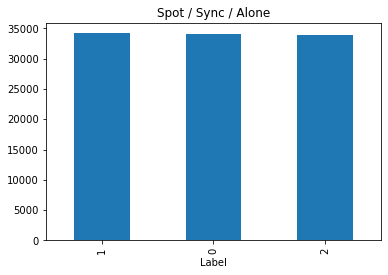

In [52]:
df_all['Type'].value_counts().plot.bar()
plt.title('Spot / Sync / Alone')
plt.xlabel('Label')
plt.show()

In [53]:
df_all

,Time_x,Frame ID_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
28445,182.5492,21577,-161.93030,215.8074,99.368170,12.80461,-43.17722,-168.68700,1.445794,0.597092,...,209.5091,172.5597,-2.273207,342.2353,15.95552,134.07660,0.0,1.476075,1.0,1
28446,182.5659,21579,-161.32040,214.3152,96.388420,20.12839,-83.41072,-164.68020,1.420835,0.606304,...,210.0906,172.0918,-1.983218,342.6916,16.18578,135.29430,0.0,1.474956,1.0,1
28447,182.5823,21581,-161.17540,214.2668,93.776190,26.72322,-21.68755,-161.18140,1.396630,0.600762,...,210.3185,171.5113,-1.979968,343.1189,16.28249,135.87790,0.0,1.474284,1.0,1
28448,182.5990,21582,-160.70280,213.7240,92.251300,54.83594,-62.98368,-176.94200,1.394494,0.609358,...,210.5154,171.2924,-2.009449,343.6653,16.53986,136.04660,0.0,1.469920,1.0,1
28449,182.6154,21584,-161.22440,213.5300,90.049910,-21.88871,-43.74665,-129.30340,1.395495,0.642190,...,211.0113,170.9632,-2.211502,346.8622,19.01384,136.32600,0.0,1.451241,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,856.1965,67304,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,0.629213,1.887313,...,129.1261,148.7041,62.824040,300.6781,-33.58672,128.75430,0.0,0.000000,0.0,0
34040,856.2291,67306,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,0.667618,1.870251,...,129.2868,148.1146,63.112180,285.6505,-53.66640,106.02620,0.0,0.000000,0.0,0
34041,856.2631,67309,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,0.725945,1.838532,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,0
34042,856.2958,67311,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,1.824587,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,0


In [54]:
df_all

,Time_x,Frame ID_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
28445,182.5492,21577,-161.93030,215.8074,99.368170,12.80461,-43.17722,-168.68700,1.445794,0.597092,...,209.5091,172.5597,-2.273207,342.2353,15.95552,134.07660,0.0,1.476075,1.0,1
28446,182.5659,21579,-161.32040,214.3152,96.388420,20.12839,-83.41072,-164.68020,1.420835,0.606304,...,210.0906,172.0918,-1.983218,342.6916,16.18578,135.29430,0.0,1.474956,1.0,1
28447,182.5823,21581,-161.17540,214.2668,93.776190,26.72322,-21.68755,-161.18140,1.396630,0.600762,...,210.3185,171.5113,-1.979968,343.1189,16.28249,135.87790,0.0,1.474284,1.0,1
28448,182.5990,21582,-160.70280,213.7240,92.251300,54.83594,-62.98368,-176.94200,1.394494,0.609358,...,210.5154,171.2924,-2.009449,343.6653,16.53986,136.04660,0.0,1.469920,1.0,1
28449,182.6154,21584,-161.22440,213.5300,90.049910,-21.88871,-43.74665,-129.30340,1.395495,0.642190,...,211.0113,170.9632,-2.211502,346.8622,19.01384,136.32600,0.0,1.451241,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,856.1965,67304,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,0.629213,1.887313,...,129.1261,148.7041,62.824040,300.6781,-33.58672,128.75430,0.0,0.000000,0.0,0
34040,856.2291,67306,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,0.667618,1.870251,...,129.2868,148.1146,63.112180,285.6505,-53.66640,106.02620,0.0,0.000000,0.0,0
34041,856.2631,67309,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,0.725945,1.838532,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,0
34042,856.2958,67311,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,1.824587,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,0


In [55]:
df_all_test[' Hand Type_y'] = 0.0
df_all[' Hand Type_y'] = 0.0

In [56]:
df_all

,Time_x,Frame ID_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
28445,182.5492,21577,-161.93030,215.8074,99.368170,12.80461,-43.17722,-168.68700,1.445794,0.597092,...,209.5091,172.5597,-2.273207,342.2353,15.95552,134.07660,0.0,1.476075,1.0,1
28446,182.5659,21579,-161.32040,214.3152,96.388420,20.12839,-83.41072,-164.68020,1.420835,0.606304,...,210.0906,172.0918,-1.983218,342.6916,16.18578,135.29430,0.0,1.474956,1.0,1
28447,182.5823,21581,-161.17540,214.2668,93.776190,26.72322,-21.68755,-161.18140,1.396630,0.600762,...,210.3185,171.5113,-1.979968,343.1189,16.28249,135.87790,0.0,1.474284,1.0,1
28448,182.5990,21582,-160.70280,213.7240,92.251300,54.83594,-62.98368,-176.94200,1.394494,0.609358,...,210.5154,171.2924,-2.009449,343.6653,16.53986,136.04660,0.0,1.469920,1.0,1
28449,182.6154,21584,-161.22440,213.5300,90.049910,-21.88871,-43.74665,-129.30340,1.395495,0.642190,...,211.0113,170.9632,-2.211502,346.8622,19.01384,136.32600,0.0,1.451241,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,856.1965,67304,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,0.629213,1.887313,...,129.1261,148.7041,62.824040,300.6781,-33.58672,128.75430,0.0,0.000000,0.0,0
34040,856.2291,67306,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,0.667618,1.870251,...,129.2868,148.1146,63.112180,285.6505,-53.66640,106.02620,0.0,0.000000,0.0,0
34041,856.2631,67309,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,0.725945,1.838532,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,0
34042,856.2958,67311,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,1.824587,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,0


In [57]:
df_all = df_all.iloc[::5, :]
df_all_test = df_all_test.iloc[::5, :]
RefreshData(df_all)
RefreshData(df_all_test)

In [58]:
X_train=df_all.drop(columns='Type')
y_train=df_all['Type']
X_test=df_all_test.drop(columns='Type')
y_test=df_all_test['Type']

In [59]:
scale = StandardScaler()
X_train = pd.DataFrame(scale.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scale.fit_transform(X_test.values), columns=X_test.columns, index=X_test.index)

In [60]:
X_train

,Time_x,Frame ID_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,-2.504470,-1.614073,-0.955007,0.148329,1.304713,0.092636,-0.201829,-1.346137,0.452493,-0.146029,...,-0.083164,1.200644,-0.055861,-1.409663,0.776346,-0.170422,-0.522004,-0.300515,1.447411,5.255788
1,-2.503874,-1.613787,-0.942001,0.087170,1.070319,0.027357,-0.220926,-1.198583,0.377796,-0.120994,...,-0.169896,1.224983,-0.086331,-1.419065,0.859576,-0.070862,-0.505529,-0.300515,1.385183,5.255788
2,-2.503277,-1.613469,-0.953039,0.108918,0.895394,-0.225472,0.110321,-0.589345,0.348662,-0.063234,...,-0.542679,1.257606,-0.031031,-1.581446,0.805124,0.064174,-0.467257,-0.300515,0.887908,5.255788
3,-2.502678,-1.613183,-0.936695,0.046305,0.761067,0.161678,-0.333424,-0.567431,0.254132,-0.123841,...,-1.038019,1.525773,0.092292,-1.696013,1.096299,0.021694,-0.705551,-0.300515,-0.339793,-0.270553
4,-2.502082,-1.612865,-0.930209,-0.008263,0.604397,-0.357753,0.047930,-0.558306,0.123631,-0.078484,...,-1.334893,1.617285,0.124795,-1.964263,1.485423,0.458135,-0.963534,-0.300515,-0.133625,-0.270553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20429,2.347111,-0.161459,0.814947,-1.195391,-1.196931,0.110732,-0.581472,-0.247808,-1.021429,1.448471,...,0.282767,0.141081,-0.502129,-0.324209,0.778445,0.383049,-0.181756,-0.300515,-0.743850,-0.270553
20430,2.348309,-0.161109,0.776785,-1.198814,-1.244569,-0.103970,0.151475,-0.111940,-1.044600,1.477229,...,0.286393,0.141458,-0.485230,-0.300905,0.780090,0.447409,-0.144260,-0.300515,-0.743850,-0.270553
20431,2.349512,-0.160823,0.648158,-0.975679,-1.190718,-0.290492,0.390030,0.599494,-0.911675,1.426373,...,0.317280,0.158035,-0.456513,-0.266041,0.792077,0.243315,-0.260486,-0.300515,-0.743850,-0.270553
20432,2.350711,-0.160505,0.619379,-0.714066,-1.015559,-0.010465,0.332992,0.486102,-0.537748,1.158926,...,0.380983,0.116366,-0.465792,-0.215420,0.579714,-0.116165,-0.139064,-0.300515,-0.743850,-0.270553


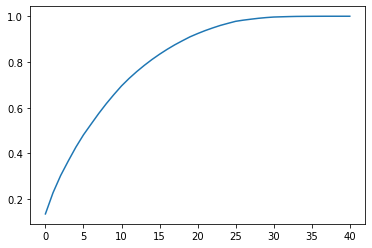

In [61]:
#checking how much components we can remove from the data without making a big reduce to the accuracy
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [63]:
#we saw that the elbow is long so we can remove 734! features and still get a high accuracy,lets try
pca = PCA(n_components=27)
train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("numer of attributes after PCA: ",pca.n_components_,"\nnumber of attributes before PCA: ",len(list(X_train.columns)))

numer of attributes after PCA:  27 
number of attributes before PCA:  41


27


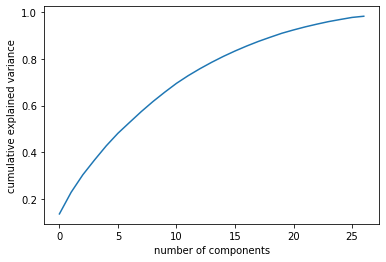

In [64]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(pca.n_components_)

In [65]:
# set the vector X (train\test) with the new features
X_train_PCA1 = pd.DataFrame(train_pca)
X_test_PCA1 = pd.DataFrame(X_test_pca)

In [89]:
def stats(model):
    y_pred=model.predict(X_test_PCA1)
    plt.figure(1, figsize= (10,10))
    c_m=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
    print("Confusion Matrix ")
    sns.heatmap(c_m.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    plt.close()
    print(classification_report(y_test, y_pred,digits=4))

In [90]:
X_test_PCA1.shape

(6021, 27)

Confusion Matrix 


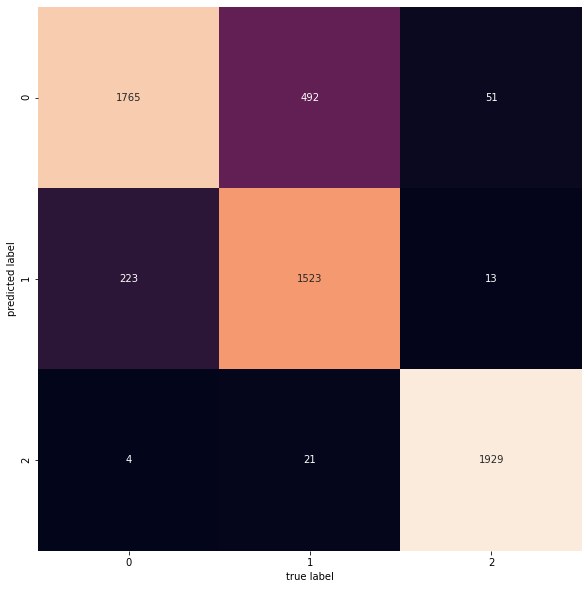

              precision    recall  f1-score   support

           0     0.7647    0.8860    0.8209      1992
           1     0.8658    0.7480    0.8026      2036
           2     0.9872    0.9679    0.9775      1993

    accuracy                         0.8665      6021
   macro avg     0.8726    0.8673    0.8670      6021
weighted avg     0.8726    0.8665    0.8666      6021



In [93]:
knn = KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3)
knn.fit(X_train_PCA1, y_train)
Y_pred = knn.predict(X_test_PCA1)

scores["knn"]=accuracy_score(y_test,Y_pred)
stats(knn)

In [ ]:
    knn_param_grid =     {
         'n_neighbors': list(range(3,100,10)),
         'weights':['uniform','distance'],
         'metric': ['euclidean','manhattan','minkowski'],
        }

    knn_grid_search = RandomizedSearchCV(
        KNeighborsClassifier(n_jobs=-1),
        knn_param_grid,
        cv=3,
        scoring='accuracy',
        return_train_score=True,
        random_state=0
    )
    knn_grid_search.fit(X_train_PCA1, y_train)
    
knn_grid_search.best_estimator_

In [ ]:
knn_grid_search.best_score_

In [ ]:
knn = KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=53,
                     weights='distance')
knn.fit(X_train_PCA1, y_train)
Y_pred = knn.predict(X_test_PCA1)

scores["knn"]=accuracy_score(y_test,Y_pred)
stats(knn)

In [ ]:
# Build gaussian naive bayes model
gnb = GaussianNB()
gnb.fit(X_train_PCA1,y_train)
y_pred = gnb.predict(X_test_PCA1)
scores["gnb"]=accuracy_score(y_test, y_pred)
stats(gnb)

In [ ]:
# Build LogisticRegression model
clf_log = LogisticRegression(n_jobs = -1)
clf_log.fit(X_train_PCA1,y_train)
y_pred_logistic= clf_log.predict(X_test_PCA1)
scores["clf_log"]=accuracy_score(y_test, y_pred_logistic)
stats(clf_log)

In [ ]:
    clf=RandomForestClassifier(n_estimators=250)
    clf.fit(X_train_PCA1, y_train)
    y_pred=clf.predict(X_test_pca)
    print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
# set the xgboost model.
xgb_reg = xgboost.XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
xgb_reg.fit(X_train_PCA1, y_train)
y_pred_xgb_reg = xgb_reg.predict(X_test_PCA1)
xgb_reg_accuracy = metrics.accuracy_score(y_test, y_pred_xgb_reg)

print("Test Accuracy score: {}".format(xgb_reg_accuracy))

In [ ]:
# set the adaboost model with the new form,after pca.
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,algorithm="SAMME.R",learning_rate=0.35
)
model=classifier.fit(X_train_PCA1,y_train)

y_pred_ada = model.predict(X_test_PCA1)
ada_accuracy = metrics.accuracy_score(y_test, y_pred_ada)

scores["XGBoost"]=accuracy_score(y_test,y_pred_ada)
stats(model)

In [ ]:
# Build "hard" voting model
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=400,
                       n_jobs=-1, random_state=0)
xgb_clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
knn = KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=53,
                     weights='distance')

voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf),('xgb', xgb_clf),('knn_bag', BaggingClassifier(knn))],voting='hard',weights=[1,4,1],n_jobs=-1)
voting_clf.fit(X_train_PCA1,y_train)
y_pred_clf=voting_clf.predict(X_test_PCA1)
scores["voting_clf"]=accuracy_score(y_test, y_pred_clf)
stats(voting_clf)

In [ ]:
# Build stack model
stack_model = StackingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf),('knn_bag', BaggingClassifier(knn))],final_estimator=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None))
stack_model.fit(X_train_PCA1,y_train)
y_test_pred = stack_model.predict(X_test_PCA1)


scores["stack_model"]=accuracy_score(y_test, y_test_pred)
stats(stack_model)

In [ ]:
# Build stack model
stack_model = StackingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf),('knn_bag', BaggingClassifier(knn))],final_estimator=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None))
stack_model.fit(X_train_PCA1,y_train)
y_test_pred = stack_model.predict(X_test_PCA1)


scores["stack_model"]=accuracy_score(y_test, y_test_pred)
stats(stack_model)